# Model Problem: 1D Poisson
 
Poisson Equation:

\begin{align*}
\Delta u &= f, & \Omega \\
u &= 0, & \partial \Omega
\end{align*}

Discretizing with finite differences on a regular 1D mesh:

\begin{align*}
&\frac{-u_{i-1} + 2u_i - u_{i+1}}{h^2} = f_i, & i = 1,2,..., N-1 \\
&u_0 = u_N = 0
\end{align*}

Resulting matrix system:

\begin{align}
\frac{1}{h^2}\begin{bmatrix}
2 & -1 & & & & & & \\
-1 & 2 & -1 & & & & & \\
& -1 & 2 & - 1 & & & & \\
&  & \ddots & \ddots & \ddots & & & \\
& & & & & & & \\
& & & & & -1 & 2 & -1 \\
& & & & & & -1 & 2 \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
\\
\vdots \\
\\
\\
u_{N-1} \\
\end{bmatrix}
=
\begin{bmatrix}
f_1 \\
f_2 \\
\\
\vdots \\
\\
\\
f_{N-1} \\
\end{bmatrix}
\end{align}

In [73]:
# Import some python libraries we need
import numpy as np
import matplotlib.pyplot as plt

# Size of the problem
N = 16

# 1D Model problem
A = np.diag(2*np.ones(N-1)) + np.diag(-1*np.ones(N-2),k=-1) + np.diag(-1*np.ones(N-2),k=1) 

# Print the matrix
# print(A)

# Get the eigenvalues and eigenvectors of A (eigsh is for symmetric matrices only)
lam, v = np.linalg.eigh(A)

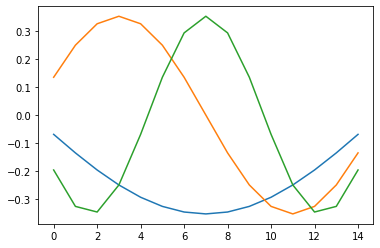

In [53]:
# Plot some different eigenvectors of A
for k in [0,1,2]:
    plt.plot(v[:,k])

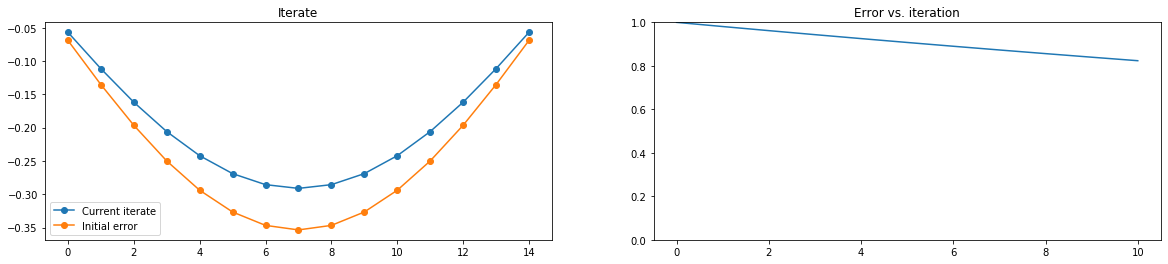

In [69]:
# Convergence of weighted Jacobi on different eigenvectors

# Wave number. Choose value between 0 and N-2.
k = 0

# Weight for Jacobi
omega = 1

# Define a zero right-hand side
f = np.zeros(N-1)

# Set initial guess to eigenvector k
u = v[:,k].copy()
u_next = u.copy()

# Do weighted Jacobi iterations and measure error (norm of the iterate since solution is zero)
numIterations = 10
err = np.zeros(numIterations+1)
err[0] = np.linalg.norm(u)
for it in range(numIterations):
    for i in range(N-1):
        # Initialize to the right-hand side
        u_next[i] = f[i]

        # Subtract off (L+U)u
        for j in range(N-1):
            if j == i:
                diag = A[i,j]
            else:
                u_next[i] = u_next[i] - A[i,j]*u[j]

        # Divide by the diagonal        
        u_next[i] = u_next[i]/diag

    # Update iterate
    u = (1.0 - omega)*u + omega*u_next
    err[it+1] = np.linalg.norm(u)
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Iterate')
plt.plot(u,'-o')
plt.plot(v[:,k],'-o')
plt.legend(['Current iterate','Initial error'])

# Plot error vs. iteration
plt.subplot(1,2,2)
plt.title('Error vs. iteration')
plt.plot(err)
plt.ylim((0,1))
plt.show()

In [61]:
# Get the coarse grid problem

# Size of the problem
N_c = int(N/2)

# 1D Model problem with N_c = N/2
A_c = np.diag(2*np.ones(N_c-1)) + np.diag(-1*np.ones(N_c-2),k=-1) + np.diag(-1*np.ones(N_c-2),k=1) 

# Print the matrix
# print(A_c)

# Define a zero right-hand side
f_c = np.zeros(N_c-1)

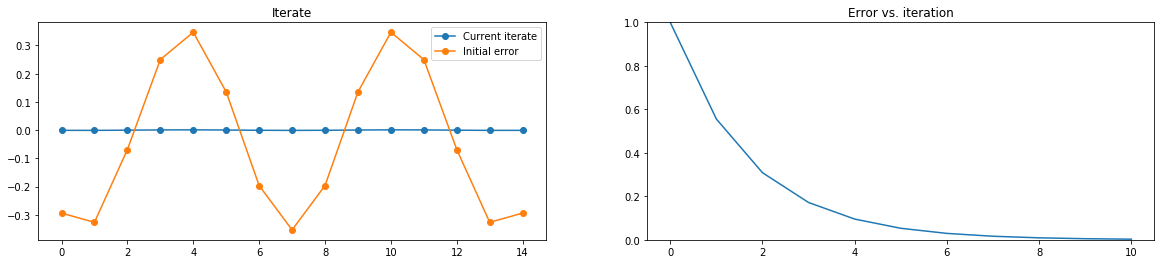

In [65]:
# Convergence of weighted Jacobi on the coarse problem

# Wave number. Choose value between 0 and (N-2)/2.
k = 4

# Weight for Jacobi
omega = 1

# Set initial guess to eigenvector k
u = v[:,k].copy()
u_next = u.copy()

# Do weighted Jacobi iterations and measure error (norm of the iterate since solution is zero)
numIterations = 10
err = np.zeros(numIterations+1)
err[0] = np.linalg.norm(u)
for it in range(numIterations):
    for i in range(N-1):
        # Initialize to the right-hand side
        u_next[i] = f[i]

        # Subtract off (L+U)u
        for j in range(N-1):
            if j == i:
                diag = A[i,j]
            else:
                u_next[i] = u_next[i] - A[i,j]*u[j]

        # Divide by the diagonal        
        u_next[i] = u_next[i]/diag

    # Update iterate
    u = (1.0 - omega)*u + omega*u_next
    err[it+1] = np.linalg.norm(u)
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Iterate')
plt.plot(u,'-o')
plt.plot(v[:,k],'-o')
plt.legend(['Current iterate','Initial error'])

# Plot error vs. iteration
plt.subplot(1,2,2)
plt.title('Error vs. iteration')
plt.plot(err)
plt.ylim((0,1))
plt.show()

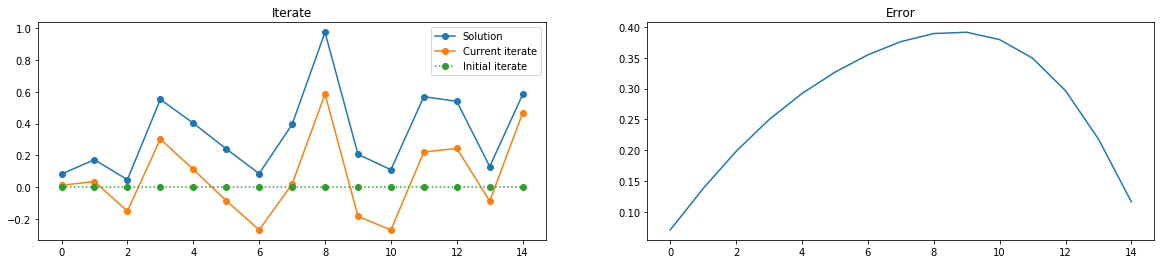

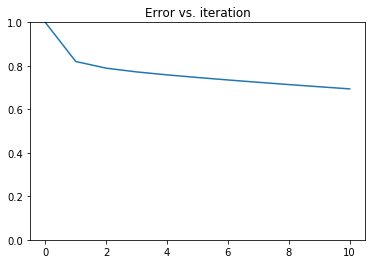

In [86]:
# Demonstrating the smoothing property of weighted Jacobi

# Weight for Jacobi
omega = 2/3

# Set random rhs and zero initial guess
u_final = np.random.rand(N-1)
f = np.dot(A, u_final)
u = np.zeros(N-1)
u_next = u.copy()
u_init = u.copy()

# Do weighted Jacobi iterations and measure error (norm of the iterate since solution is zero)
numIterations = 10
err = np.zeros(numIterations+1)
err[0] = np.linalg.norm(u_final - u)
for it in range(numIterations):
    for i in range(N-1):
        # Initialize to the right-hand side
        u_next[i] = f[i]

        # Subtract off (L+U)u
        for j in range(N-1):
            if j == i:
                diag = A[i,j]
            else:
                u_next[i] = u_next[i] - A[i,j]*u[j]

        # Divide by the diagonal        
        u_next[i] = u_next[i]/diag

    # Update iterate
    u = (1.0 - omega)*u + omega*u_next
    err[it+1] = np.linalg.norm(u_final - u)
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Iterate')
plt.plot(u_final,'-o')
plt.plot(u,'-o')
plt.plot(u_init,':o')
plt.legend(['Solution','Current iterate','Initial iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error')
plt.plot(u_final - u)
plt.show()

# Plot error vs. iteration
plt.title('Error vs. iteration')
plt.plot(err/err[0])
plt.ylim((0,1))
plt.show()